In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [55]:
with open('data.env', "r") as f:
    lambdas = []
    top = []
    bottom = []
    for line in f.readlines():
        if "'" not in line:
            try:
                l, t, b = line.split()
                lambdas.append(float(l))
                top.append(float(t))
                bottom.append(float(b))
            except:
                pass
top = np.array(top)
lambdas = np.array(lambdas)
bottom = np.array(bottom)

In [56]:
# Load spectrum data:
df = pd.read_excel('espectro.xlsx')
lambdas2 = df['Lambda (nm)'].values
film = df['Película'].values
glass = df['Vidrio'].values
cut = np.where((lambdas2 > lambdas[0]-1) & (lambdas2 < lambdas[-1]+1))
lambdas2 = lambdas2[cut]
film = film[cut]
glass = glass[cut]
s = 1/glass + np.sqrt(1/glass - 1)

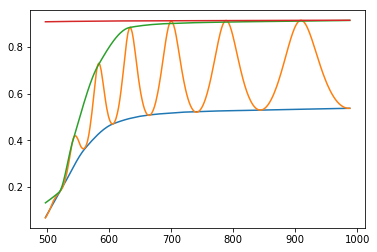

In [58]:
plt.plot(lambdas, bottom)
plt.plot(lambdas, film)
plt.plot(lambdas, top)
plt.plot(lambdas, glass)
plt.show()

In [59]:
# Ec. 11 de Swanepoel:

N = 2*s*(top-bottom)/(top*bottom) + (s*s+1)/2
n = np.sqrt(N + np.sqrt(N*N - s*s))

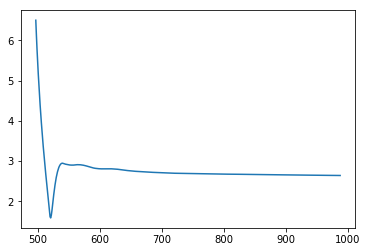

In [60]:
plt.plot(lambdas, n)
plt.show()